In [209]:
import pandas as pd
import networkx as nx
import json
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import pprint

In [210]:
import pandas as pd
import networkx as nx

# Load dataFrame
df = pd.read_csv("C:/Users/sujik/OneDrive/Documents/MS - Data Science/Semester 3 (Fall_23)/DSC 530 - Data Visualization/Week 9/Major Assignment 3/data_scopus.csv")

In [211]:
filtered_data = df['Author(s) ID'] != '[No author id available]'
df = df[filtered_data]

In [212]:
# Split the 'Authors with affiliations' column to get multiple Author names and affiliations
df['Author ID'] = df['Author(s) ID'].str.split(';')
df['Author Affiliations'] = df['Authors with affiliations'].str.split(';')
df['Author Names'] = df['Authors'].str.split(', ')  # Split author names by comma and space

# Create a dictionary to map authors to their countries and names
author_info_dict = {}
for index, row in df.iterrows():
    author_ids = row['Author ID']
    affiliations = row['Author Affiliations']
    names = row['Author Names']
    for author_id, affiliation, author_name in zip(author_ids, affiliations, names):
        country = affiliation.split(',')[-1].strip()  # Extract the last part of the affiliation as the country
        author_info_dict[author_id] = {"Country": country, "Name": author_name}

# Group the main DataFrame by authors and aggregate the number of publications and citations
author_publications_citations = df.explode('Author ID').groupby('Author ID').agg({
    'EID': 'count',  # Count of publications
    'Cited by': 'sum',  # Sum of citations
}).reset_index()

# Rename the columns for clarity
author_publications_citations.columns = ['Author ID', 'Publications', 'Citations']

# Filter out rows with an empty author ID
author_publications_citations = author_publications_citations[author_publications_citations['Author ID'] != '']

# Create a list of nodes for authors with attributes, including country and name
author_nodes = []

for index, row in author_publications_citations.iterrows():
    author_id = row['Author ID']
    publications = row['Publications']
    citations = row['Citations']
    author_info = author_info_dict.get(author_id, {})  # Get the country and name for the author
    
    author_attributes = {
        "Publications": publications,
        "Citations": citations,
        "Country": author_info.get("Country", ""),
        "Name": author_info.get("Name", ""),
        # Add other attributes as needed
    }
    
    author_node = (author_id, author_attributes)
    
    author_nodes.append(author_node)

# Now each author node in the author_nodes list has an additional "Author Name" attribute.


In [213]:
author_nodes

[('10139174700',
  {'Publications': 2,
   'Citations': 24.0,
   'Country': 'United Kingdom',
   'Name': 'Patel H.'}),
 ('10139307000',
  {'Publications': 1,
   'Citations': 7.0,
   'Country': 'Switzerland',
   'Name': 'Stefani O.'}),
 ('10140073200',
  {'Publications': 3,
   'Citations': 26.0,
   'Country': 'United Kingdom',
   'Name': 'Sharples S.'}),
 ('10140476700',
  {'Publications': 3,
   'Citations': 31.0,
   'Country': 'Russian Federation',
   'Name': 'Okladnikov I.'}),
 ('10141347300',
  {'Publications': 1,
   'Citations': 17.0,
   'Country': 'Greece',
   'Name': 'Karaseitanidis I.'}),
 ('10142869100',
  {'Publications': 1,
   'Citations': 7.0,
   'Country': 'Sweden',
   'Name': 'Saluäär D.'}),
 ('10144930400',
  {'Publications': 1,
   'Citations': 7.0,
   'Country': 'France',
   'Name': 'Letourneur S.'}),
 ('10238956700',
  {'Publications': 1,
   'Citations': 8.0,
   'Country': 'Austria',
   'Name': 'Ohmann S.'}),
 ('10840414800',
  {'Publications': 2,
   'Citations': 0.0,
   

In [214]:
G = nx.Graph()
G.add_nodes_from(author_nodes)

In [215]:
edges = []

for index, row in df.iterrows():
    current_authors = row['Author ID']
    if len(current_authors) > 1:
        for author1 in current_authors:
            for author2 in current_authors:
                if author1 != author2 and author1 != '' and author2 != '':
                    edges.append((author1, author2))

In [216]:
G.add_edges_from(edges)

In [217]:
len(edges)

6380

In [218]:
#pos = nx.drawing.circular_layout(G)
pos = nx.drawing.spring_layout(G)

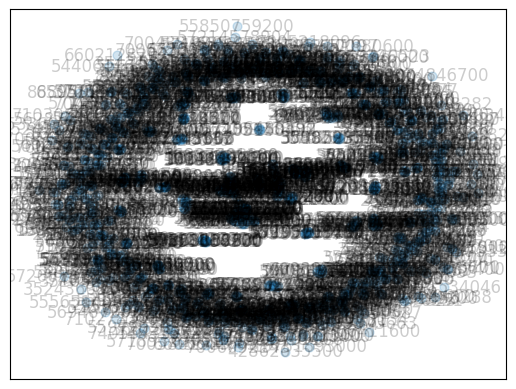

In [219]:
nx.draw_networkx(G,pos=pos, node_size=40,alpha=.2)

In [220]:
# Create a set to store unique countries
unique_countries = set()

# Iterate through the DataFrame to extract unique countries
for index, row in df.iterrows():
    affiliations = row['Author Affiliations']
    for affiliation in affiliations:
        country = affiliation.split(',')[-1].strip()  # Extract the last part of the affiliation as the country
        unique_countries.add(country)

# Find the number of unique countries
num_unique_countries = len(unique_countries)
print(f"Number of unique countries: {num_unique_countries}")

Number of unique countries: 60


In [221]:
# Create a dictionary to store unique countries and their counts
unique_countries_dict = {}

# Iterate through the DataFrame to extract unique countries
for index, row in df.iterrows():
    affiliations = row['Author Affiliations']
    for affiliation in affiliations:
        country = affiliation.split(',')[-1].strip()  # Extract the last part of the affiliation as the country
        # Update the count for the country in the dictionary
        unique_countries_dict[country] = unique_countries_dict.get(country, 0) + 1

# Print the unique countries and their counts
for country, count in unique_countries_dict.items():
    print(f"Country: {country}, Count: {count}")


Country: Canada, Count: 67
Country: United States, Count: 586
Country: Italy, Count: 31
Country: Serbia, Count: 2
Country: Germany, Count: 166
Country: Japan, Count: 58
Country: Australia, Count: 39
Country: India, Count: 20
Country: China, Count: 114
Country: Thailand, Count: 6
Country: Russian Federation, Count: 64
Country: Poland, Count: 27
Country: Spain, Count: 48
Country: Belgium, Count: 13
Country: South Korea, Count: 80
Country: Pakistan, Count: 3
Country: Bulgaria, Count: 2
Country: Slovakia, Count: 3
Country: United Kingdom, Count: 98
Country: Chile, Count: 3
Country: Turkey, Count: 5
Country: Brazil, Count: 66
Country: Switzerland, Count: 16
Country: Egypt, Count: 1
Country: Hong Kong, Count: 6
Country: Saudi Arabia, Count: 3
Country: Czech Republic, Count: 30
Country: Portugal, Count: 17
Country: Tunisia, Count: 10
Country: France, Count: 45
Country: Taiwan, Count: 29
Country: Ireland, Count: 11
Country: Colombia, Count: 8
Country: Kazakhstan, Count: 3
Country: Philippines,

In [222]:
import networkx as nx
import matplotlib.pyplot as plt

# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Add degree centrality as a node attribute
nx.set_node_attributes(G, degree_centrality, 'Degree Centrality')

# Print the degree centrality for each node
for author_id, centrality in degree_centrality.items():
    print(f"Author ID: {author_id}, Degree Centrality: {centrality}")

degree_centrality.items()

Author ID: 10139174700, Degree Centrality: 0.007736943907156673
Author ID: 10139307000, Degree Centrality: 0.004513217279174726
Author ID: 10140073200, Degree Centrality: 0.009026434558349452
Author ID: 10140476700, Degree Centrality: 0.0038684719535783366
Author ID: 10141347300, Degree Centrality: 0.0038684719535783366
Author ID: 10142869100, Degree Centrality: 0.004513217279174726
Author ID: 10144930400, Degree Centrality: 0.004513217279174726
Author ID: 10238956700, Degree Centrality: 0.0019342359767891683
Author ID: 10840414800, Degree Centrality: 0.0019342359767891683
Author ID: 11041590100, Degree Centrality: 0.0032237266279819474
Author ID: 11439968500, Degree Centrality: 0.0019342359767891683
Author ID: 11939495200, Degree Centrality: 0.0012894906511927789
Author ID: 12039145700, Degree Centrality: 0.0032237266279819474
Author ID: 12139031400, Degree Centrality: 0.0012894906511927789
Author ID: 12241373400, Degree Centrality: 0.0012894906511927789
Author ID: 12753630700, Degree

dict_items([('10139174700', 0.007736943907156673), ('10139307000', 0.004513217279174726), ('10140073200', 0.009026434558349452), ('10140476700', 0.0038684719535783366), ('10141347300', 0.0038684719535783366), ('10142869100', 0.004513217279174726), ('10144930400', 0.004513217279174726), ('10238956700', 0.0019342359767891683), ('10840414800', 0.0019342359767891683), ('11041590100', 0.0032237266279819474), ('11439968500', 0.0019342359767891683), ('11939495200', 0.0012894906511927789), ('12039145700', 0.0032237266279819474), ('12139031400', 0.0012894906511927789), ('12241373400', 0.0012894906511927789), ('12753630700', 0.0032237266279819474), ('12753631600', 0.0006447453255963894), ('12767087400', 0.006447453255963895), ('12771242900', 0.0019342359767891683), ('12778673800', 0.0025789813023855577), ('12781821100', 0.004513217279174726), ('12806905400', 0.0019342359767891683), ('12808778700', 0.0032237266279819474), ('13105681700', 0.0012894906511927789), ('13405022200', 0.00193423597678916

In [223]:
import pandas as pd
import networkx as nx

# Calculate degree centrality bins
centrality_values = list(degree_centrality.values())
bins = pd.cut(centrality_values, bins=8, labels=False)

# Convert bins to float during mapping to be compatible with json.dump
bin_mapping = dict(zip(degree_centrality.keys(), map(float, bins)))

# Add degree centrality as a node attribute
nx.set_node_attributes(G, degree_centrality, 'Degree Centrality')

# Add bin number as a node attribute
nx.set_node_attributes(G, bin_mapping, 'Bin Number')

In [224]:
from networkx.readwrite import json_graph

In [225]:
with open("publication_network.json",'w') as f:
    json.dump(json_graph.node_link_data(G),f)

<Axes: ylabel='Count'>

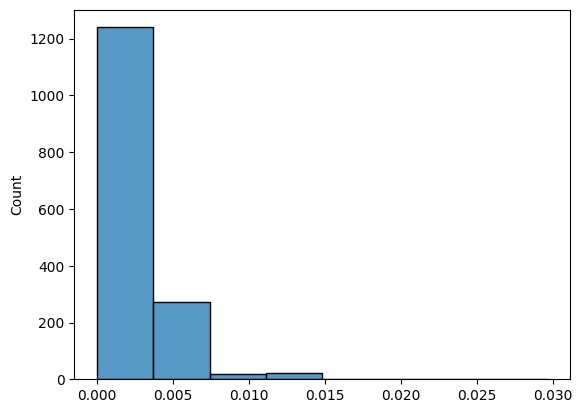

In [226]:
import seaborn as sns
sns.histplot(nx.degree_centrality(G), bins = 8)

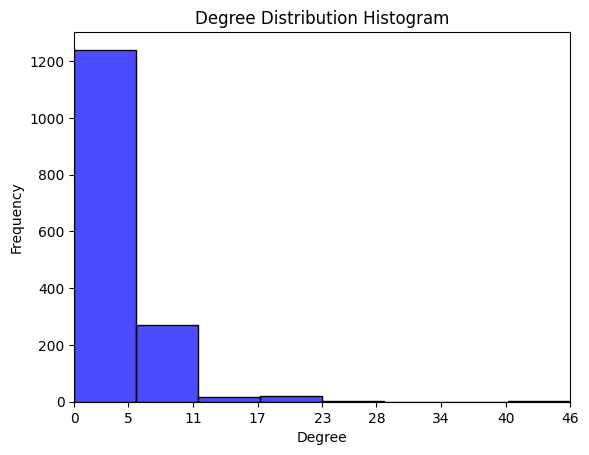

In [227]:
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt

degrees = dict(G.degree())

# Plot the histogram
ax = sns.histplot(list(degrees.values()), bins=8, kde=False, color='blue', alpha=0.7)

# Set the x-axis range from 0 to the maximum degree
plt.xlim(0, max(degrees.values()))

# Set bin numbers as x-axis ticks
bin_edges = ax.patches[0].get_x()
bin_width = ax.patches[1].get_x() - ax.patches[0].get_x()
bin_numbers = [int(bin_edges + i * bin_width) for i in range(9)]
plt.xticks(bin_numbers)

plt.title('Degree Distribution Histogram')
plt.xlabel('Degree')
plt.ylabel('Frequency')

plt.show()

In [231]:
# Get the number of nodes and edges
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

# Print the results
print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)

Number of nodes: 1552
Number of edges: 3049
